Chapter 17

# 切面
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码的目的是定义并可视化一个二次函数 $f(x_1, x_2)$ 及其在特定点处的切平面，从而观察该函数的几何特性。其主要包括以下几个部分：

### 1. 函数和网格定义
首先，代码定义了符号变量 $x_1, x_2, p_1, p_2$，并基于这些变量定义了二次函数：
$$
f(x_1, x_2) = -4x_1^2 - 4x_2^2
$$
以及另一个类似的函数 $f(p_1, p_2) = -4p_1^2 - 4p_2^2$。此外，定义了函数 `mesh_circ` 用于生成一个以 $(c_1, c_2)$ 为圆心、半径为 $r$ 的网格，该网格用于后续的可视化。

### 2. 梯度和切平面计算
接下来，代码计算了 $f(p_1, p_2)$ 在 $p_1$ 和 $p_2$ 的梯度，即：
$$
\nabla f = \left( \frac{\partial f}{\partial p_1}, \frac{\partial f}{\partial p_2} \right)
$$
基于这个梯度，构造了函数 $f(x_1, x_2)$ 在点 $(p_1, p_2)$ 处的切平面 $t(x)$：
$$
t(x) = \nabla f \cdot \begin{bmatrix} x_1 - p_1 \\ x_2 - p_2 \end{bmatrix} + f(p_1, p_2)
$$
该切平面表示在 $(p_1, p_2)$ 处的线性近似。

### 3. 数值化和网格生成
代码将 $f(x_1, x_2)$ 和 $t(x)$ 转换为适合数值计算的函数，并生成一个圆形网格 $xx1, xx2$ 用于 $f(x_1, x_2)$ 的可视化。此外，还生成了一个以 $(p_1, p_2)$ 为中心的粗略网格 $(xx1\_, xx2\_)$ 用于切平面的可视化。$p_1$ 和 $p_2$ 的值分别设为 $-1.5$ 和 $0$，并在该点计算 $f_x(p_1, p_2)$ 的函数值。

### 4. 3D 可视化
代码使用 matplotlib 的 3D 绘图库对 $f(x_1, x_2)$ 和 $t(x)$ 进行可视化。首先绘制了 $f(x_1, x_2)$ 的线框图，用灰色显示函数的二次曲面。接着在粗略网格 $(xx1\_, xx2\_)$ 上绘制了切平面的线框图，并用红色表示。最后，在 $(p_1, p_2, f_x(p_1, p_2))$ 处标记展开点，以展示二次曲面与其切平面的关系。

整体图形设置去除了坐标轴的刻度，仅保留了 $x_1, x_2$ 和 $f(x_1, x_2)$ 的标签，通过适当的视角设置，使 3D 可视化图形更加清晰直观。

In [1]:
import sympy  # 导入符号计算库 sympy
from sympy import Matrix, Transpose  # 从 sympy 中导入矩阵和转置功能
import numpy as np  # 导入数值计算库 numpy
from sympy.functions import exp  # 从 sympy.functions 中导入指数函数 exp
import matplotlib.pyplot as plt  # 导入绘图库 matplotlib.pyplot

## 定义自定义函数 mesh_circ

In [2]:
def mesh_circ(c1, c2, r, num):  # 生成圆形网格
    theta = np.arange(0, 2 * np.pi + np.pi / num, np.pi / num)  # 生成角度范围
    r = np.arange(0, r, r / num)  # 生成半径范围
    theta, r = np.meshgrid(theta, r)  # 生成网格
    xx1 = np.cos(theta) * r + c1  # 计算 x 轴坐标
    xx2 = np.sin(theta) * r + c2  # 计算 y 轴坐标
    
    return xx1, xx2  # 返回生成的网格

## 定义符号变量和函数

In [3]:
x1, x2, p1, p2 = sympy.symbols('x1 x2 p1 p2')  # 定义符号变量 x1, x2, p1, p2

In [4]:
f_x = -4 * x1**2 - 4 * x2**2  # 定义函数 f_x = -4*x1^2 - 4*x2^2
f_x  # 打印函数 f_x

-4*x1**2 - 4*x2**2

In [5]:
f_p = -4 * p1**2 - 4 * p2**2  # 定义函数 f_p = -4*p1^2 - 4*p2^2
f_p

-4*p1**2 - 4*p2**2

## 计算函数的梯度

In [6]:
grad_f = [sympy.diff(f_p, var) for var in (p1, p2)]  # 计算函数 f_p 的梯度
grad_f  # 打印梯度

[-8*p1, -8*p2]

In [7]:
f_x_fcn = sympy.lambdify([x1, x2], f_x)  # 将 f_x 转换为 lambda 函数以便数值计算

## 计算切平面

In [8]:
t_x = Matrix(grad_f).T * Matrix([[x1 - p1], [x2 - p2]]) + Matrix([f_p])  # 计算切平面表达式
print(t_x)  # 打印切平面表达式

Matrix([[-4*p1**2 - 8*p1*(-p1 + x1) - 4*p2**2 - 8*p2*(-p2 + x2)]])


In [9]:
t_x_fcn = sympy.lambdify([x1, x2, p1, p2], t_x)  # 将切平面表达式转化为 lambda 函数

## 将梯度转换为适用于 numpy 的双变量 lambda 函数

In [10]:
grad_fcn = sympy.lambdify([x1, x2], grad_f)  # 将梯度转化为 lambda 函数

## 生成圆形网格

In [11]:
xx1, xx2 = mesh_circ(0, 0, 3, 20)  # 生成以 (0, 0) 为圆心、半径为 3 的圆形网格

## 设置展开点

In [12]:
p1 = -1.5  # 展开点 p1
p2 = 0  # 展开点 p2
py = f_x_fcn(p1, p2)  # 计算 f_x 在 (p1, p2) 处的值

## 生成粗略网格

In [13]:
xx1_, xx2_ = np.meshgrid(np.linspace(p1 - 1, p1 + 1, 10),  # 设置 x1 粗略网格
                         np.linspace(p2 - 1, p2 + 1, 10))  # 设置 x2 粗略网格

## 计算二次曲面

In [14]:
ff_x = f_x_fcn(xx1, xx2)  # 计算精细网格上的函数值

## 计算切平面

In [15]:
tt_x = t_x_fcn(xx1_, xx2_, p1, p2)  # 计算粗略网格上的切平面值

## 3D 可视化

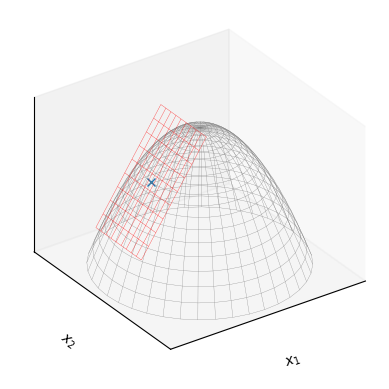

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_wireframe(xx1, xx2, ff_x, rstride=1,  # 绘制二次曲面的线框图
                  cstride=1, color=[0.5, 0.5, 0.5],  # 设置线框颜色
                  linewidth=0.2)  # 设置线框宽度

ax.plot_wireframe(xx1_, xx2_, np.squeeze(tt_x), rstride=1,  # 绘制切平面的线框图
                  cstride=1, color=[1, 0, 0],  # 设置线框颜色
                  linewidth=0.2)  # 设置线框宽度
ax.plot(p1, p2, py, 'x')  # 绘制展开点

# 去除坐标轴刻度
ax.xaxis.set_ticks([])  # 去除 x 轴刻度
ax.yaxis.set_ticks([])  # 去除 y 轴刻度
ax.zaxis.set_ticks([])  # 去除 z 轴刻度
plt.xlim(-3, 3)  # 设置 x 轴范围
plt.ylim(-3, 3)  # 设置 y 轴范围
ax.view_init(30, -125)  # 设置视角角度
ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
ax.set_zlabel('$f(x_1,x_2)$')  # 设置 z 轴标签
ax.set_proj_type('ortho')